W pliku **Ludność w  Polsce - prognozy.xlsx**, znajdziesz arkusz **ruch naturalny i wędrówkowy**.

W ramach jednej ryciny stwórz **obok siebie (mają sąsiadować w poziomie)** dwa wykresy:
- urodzenia i zgony (dwie linie, na podstawie kolumn **Ruch naturalny – Urodzenia** i **Ruch naturalny – Zgony** w arkuszu)
- emigracja i imigracja (dwie linie, na podstawie kolumn **Migracje zagraniczne na pobyt stały – Imigracja** i **Migracje zagraniczne na pobyt stały – Emigracja** w arkuszu

Do każdego wykresu dodaj legendy objaśniające znaczenie każdej z linii.

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot
from matplotlib import ticker

In [4]:
df = pd.read_excel(os.path.join("..", "01_Dane do wykresów", "Ludność w Polsce - prognozy.xlsx"), sheet_name="ruch naturalny i wędrówkowy")

In [5]:
df.head()

,Rok,Ludność na 31 XII,Ruch naturalny – Urodzenia,Ruch naturalny – Zgony,Migracje zagraniczne na pobyt stały – Imigracja,Migracje zagraniczne na pobyt stały – Emigracja,Migracje zagraniczne na pobyt stały – Saldo
0,2014,38005614,375160,376467,46129,54960,-8831
1,2015,38001529,376407,375377,47542,52657,-5115
2,2016,38001253,375756,379681,56045,52396,3649
3,2017,37989781,373569,383488,50552,52105,-1553
4,2018,37973268,370033,386849,52063,51760,303


In [6]:
df.sample(10)

,Rok,Ludność na 31 XII,Ruch naturalny – Urodzenia,Ruch naturalny – Zgony,Migracje zagraniczne na pobyt stały – Imigracja,Migracje zagraniczne na pobyt stały – Emigracja,Migracje zagraniczne na pobyt stały – Saldo
32,2046,35332468,285284,441219,74727,40397,34330
15,2029,37351763,301214,410555,64837,46437,18400
30,2044,35576521,287143,443315,73902,40973,32929
8,2022,37845141,346635,396329,57541,50065,7476
24,2038,36323889,285306,438135,71051,42805,28246
33,2047,35211729,283782,439524,75125,40122,35003
12,2026,37604664,318540,403287,62037,48025,14012
7,2021,37887359,353498,394431,56269,50533,5736
0,2014,38005614,375160,376467,46129,54960,-8831
27,2041,35948348,287086,442879,72559,41862,30697


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Rok                                              37 non-null     int64
 1   Ludność na 31 XII                                37 non-null     int64
 2   Ruch naturalny – Urodzenia                       37 non-null     int64
 3   Ruch naturalny – Zgony                           37 non-null     int64
 4   Migracje zagraniczne na pobyt stały – Imigracja  37 non-null     int64
 5   Migracje zagraniczne na pobyt stały – Emigracja  37 non-null     int64
 6   Migracje zagraniczne na pobyt stały – Saldo      37 non-null     int64
dtypes: int64(7)
memory usage: 2.2 KB


In [8]:
df.shape

(37, 7)

In [9]:
# spr sobie nazwy kolumn:
df.columns


Index(['Rok', 'Ludność na 31 XII', 'Ruch naturalny – Urodzenia',
       'Ruch naturalny – Zgony',
       'Migracje zagraniczne na pobyt stały – Imigracja',
       'Migracje zagraniczne na pobyt stały – Emigracja',
       'Migracje zagraniczne na pobyt stały – Saldo'],
      dtype='object')

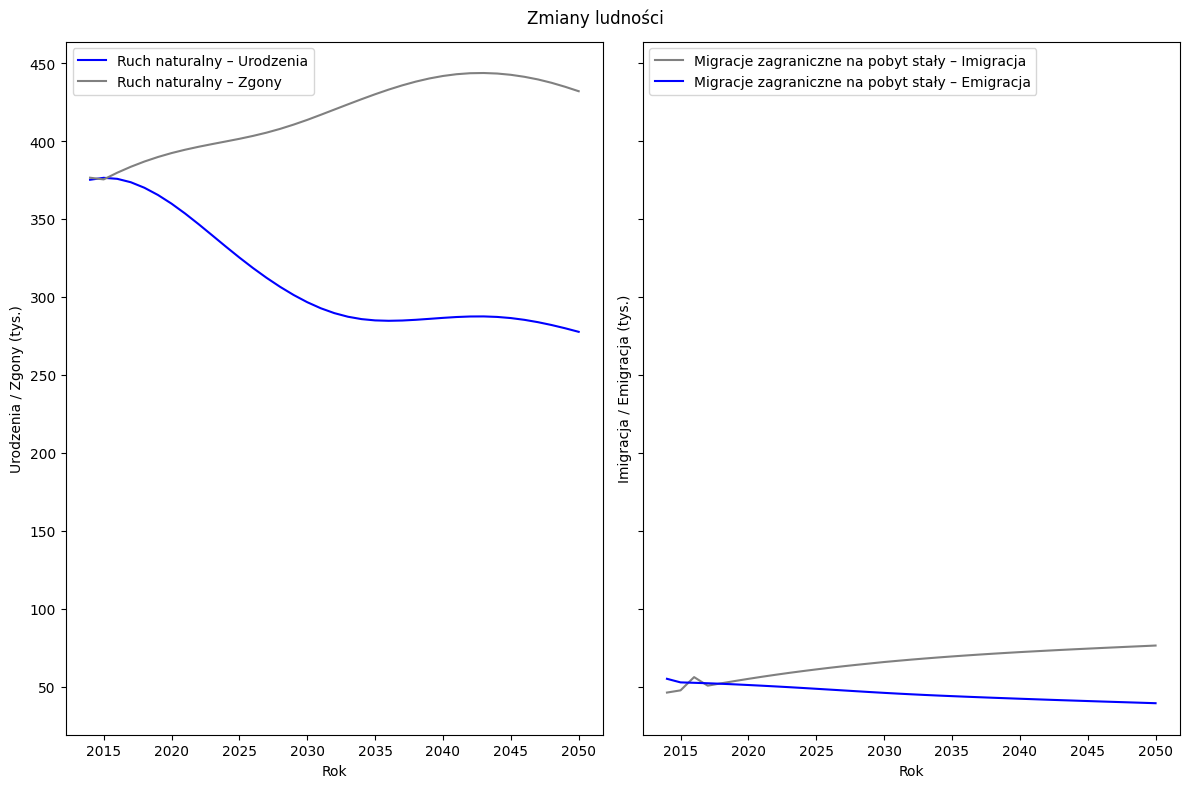

In [45]:
# dwa wykresy na jednym schemacie czyli jeden wiersz, dwie kolumny (nrows i ncols:, muszą to być parametry pozycyjne)
# axs a nie ax bo tutaj to już jest liczba mnoga (axs to jeden prostokąt)

# jeżeli wykresy są obok siebie, to muszą rozpoczynać się od takiej samej skali! od tego jest (sharey=True) żeby oś y w jedym i drugim wykresie była taka sama"

fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True)

# axs[0] - index pierwszego wykresu
axs[0].plot(
    df["Rok"],
    df["Ruch naturalny – Urodzenia"],
    color="blue",
    label="Ruch naturalny – Urodzenia")

axs[0].plot(
    df["Rok"],
    df["Ruch naturalny – Zgony"],
    color="grey",
    label = "Ruch naturalny – Zgony")

# drugi wykres:
axs[1].plot(
    df["Rok"],
    df["Migracje zagraniczne na pobyt stały – Imigracja"],
    color="grey",
    label="Migracje zagraniczne na pobyt stały – Imigracja")

axs[1].plot(
    df["Rok"],
    df["Migracje zagraniczne na pobyt stały – Emigracja"],
    color="blue",
    label="Migracje zagraniczne na pobyt stały – Emigracja")

# legenda domyślnie ustawi się sama w jakimś miejscu:
# axs[0].legend()
# axs[1].legend()

# jeżeli legenda się umieści w złym miejscu, to możemy przesunąć legendę:
axs[0].legend(loc="upper left")
axs[1].legend(loc="upper left")

#opisujemy osie x i y:
axs[0].set_xlabel("Rok")
axs[0].set_ylabel("Urodzenia / Zgony (tys.)")

axs[1].set_xlabel("Rok")
axs[1].set_ylabel("Imigracja / Emigracja (tys.)")

# fig.set_title("zmiany")

# obcinam zera na osi y:
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x / 1e3)}'))
axs[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x / 1e3)}'))

# fig bo tytuł jeden do wszystkich wykresów (jak chcę do każdego wykresu inny tytuł, to plt.title)
fig.suptitle("Zmiany ludności")


# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()